In [1]:
import os
# cleaning the data : 
feature = {'x1':[] , 'x2':[] , 'class':[]}
path = os.path.join(os.getcwd(),r'softmax.txt')
ctr = 0
with open(path,'r') as file:
    for i in file:
        if ctr == 3:
            ctr = 0
        if ctr == 0:
            feature['x1'].append(float(i))
        elif ctr == 1:
            feature['x2'].append(float(i))
        else:
            feature['class'].append(float(i))
        ctr += 1
#print(feature)

In [2]:
import pandas as pd
df = pd.DataFrame(feature)

In [3]:
print(df)

            x1        x2  class
0     0.986038  0.065523    3.0
1    -1.460077  1.651296    3.0
2    -0.896203 -1.279647    3.0
3     0.094218 -5.933941    2.0
4     2.864974 -8.743053    1.0
...        ...       ...    ...
1017  0.382264 -2.121748    2.0
1018  9.118079 -4.002538    1.0
1019  7.965036 -3.655285    1.0
1020  4.763793 -5.782141    1.0
1021 -1.313173 -8.877731    0.0

[1022 rows x 3 columns]


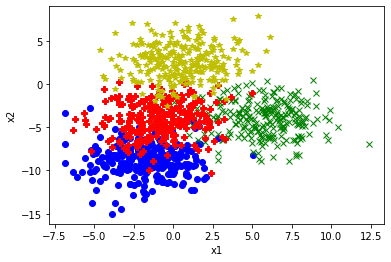

In [4]:
import numpy as np
pos0 = np.array(df[df['class'] == 0])
pos1 = np.array(df[df['class'] == 1])
pos2 = np.array(df[df['class'] == 2])
pos3 = np.array(df[df['class'] == 3])

import matplotlib.pyplot as plt
plt.plot(pos0[:,0],pos0[:,1],'bo')
plt.plot(pos1[:,0],pos1[:,1],'gx')
plt.plot(pos2[:,0],pos2[:,1],'rP')
plt.plot(pos3[:,0],pos3[:,1],'y*')
plt.xlabel('x1')
plt.ylabel('x2')
plt.show()

In [5]:
# looking at mean and variance of data  : 
data = np.array(df)
print(np.mean(data[:,0]),np.std(data[:,0]))
print(np.mean(data[:,1]),np.std(data[:,1]))

0.865396434749782 3.4738973793783807
-3.5347565211893355 4.513091397479357


In [6]:
# making input data : 
X = np.array([data[:,0],data[:,1]]) # first row is x1 and second x2
Y = np.zeros((4,X.shape[1]))
data_class = (data[:,2])
for i in range(X.shape[1]):
    arr = Y[:,i]
    arr[int(data_class[i])] = 1
    Y[:,i] = arr
print(X.shape,Y.shape)

(2, 1022) (4, 1022)


In [7]:
def soft(z):
    exps = np.exp(z)
    return exps / np.sum(exps,axis=0,keepdims = True)
def tan(x) :
    return np.tanh(x)

In [30]:
# Just one layer for softmax since 4 classes we have 4 neurons : 
def SOFTMAX(X,Y,num_iter=1000, lr = 0.0001 ):
    x = X
    y = Y
    m = Y.shape[1]
    w_ = np.random.rand(10,X.shape[0])*0.01 # 10 neurons in layer #1
    w = np.random.rand(4,10)*0.01           # 4 neurons, this is w.T in both cases
    b_ = np.zeros((10,1)) # bias for each neuron
    b = np.zeros((4,1))   # same !

    dj = []
    for i in range(num_iter + 1):
        z_ = np.dot(w_,x) + b_
        a = tan(z_)
        z = np.dot(w,a) + b
        h_theta = soft(z)
        cost = (-1/(m)) * np.sum(np.multiply(Y,np.log(h_theta)))
        dj.append(cost)
        
        dz = h_theta - y
        dw = (1/m) * np.dot(a,dz.T)
        db = (1/m) * np.sum(dz,axis = 1 , keepdims = True)
        
        
        dz_ = np.multiply(np.dot(w.T,dz) , (1 - np.power(a,2)))
        dw_ = (1/m) * np.dot(x,dz_.T)
        db_ = (1/m) * np.sum(dz_,axis = 1 , keepdims = True)
        w = w - lr*dw.T
        b = b - lr*db
        w_ = w_ - lr*dw_.T
        b_ = b_ - lr*db_
        if i % 100 == 0:
            print('cost after',i,'th iteration :',cost)
            #print(db.shape)
    return w,b,w_,b_,dj

In [31]:
w,b,w_,b_,dj = SOFTMAX(X,Y,1000,1)

cost after 0 th iteration : 1.3864646288247973
cost after 100 th iteration : 0.4498869947846267
cost after 200 th iteration : 0.3409061488888327
cost after 300 th iteration : 0.32745614558504305
cost after 400 th iteration : 0.3100835913918278
cost after 500 th iteration : 0.2956841594765644
cost after 600 th iteration : 0.2840673780429617
cost after 700 th iteration : 0.27385613447482454
cost after 800 th iteration : 0.2696891980735656
cost after 900 th iteration : 0.26456441390357527
cost after 1000 th iteration : 0.26425545860802074


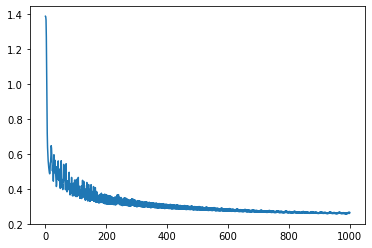

In [33]:
plt.plot(range(1001),dj)
# plot of cost and number of iterations 

In [12]:
def forward_pass(X,w,b,w_,b_):
    z1 = np.dot(w_,X) + b_
    a1 = tan(z1)
    z2 = np.dot(w,a1) + b
    a2 = soft(z2)
    return a2

In [13]:
print(np.round(forward_pass(np.array([[1],[2]]),w,b,w_,b_)))

[[0.]
 [0.]
 [0.]
 [1.]]


In [14]:
# computing our accuracy on training set : 
print(np.mean(np.round(forward_pass(X,w,b,w_,b_)) == Y)*100,'% accuracy on training data')

95.22994129158513 % accuracy on training data


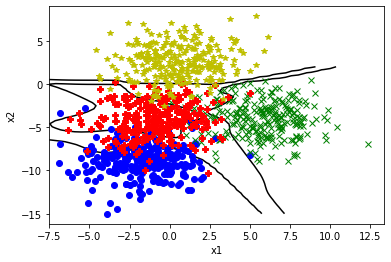

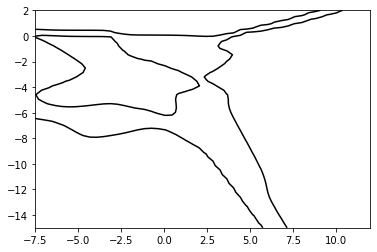

In [28]:

def decision_plot(w,b,w_,b_,k):
    u_vals = np.linspace(-7.5,12,50)
    v_vals= np.linspace(-15,2,50)
    z = np.zeros((len(u_vals),len(v_vals)))
    for i in range(len(u_vals)):
        for j in range(len(v_vals)):
            a = np.array([[u_vals[i]],[v_vals[j]]])
            val = forward_pass(a,w,b,w_,b_)
            z[i,j] = val[k]    
    plt.contour(u_vals,v_vals,z.T,0,colors = ['black'])

for i in range(4):
    decision_plot(w,b,w_,b_,i)
    
plt.plot(pos0[:,0],pos0[:,1],'bo')
plt.plot(pos1[:,0],pos1[:,1],'gx')
plt.plot(pos2[:,0],pos2[:,1],'rP')
plt.plot(pos3[:,0],pos3[:,1],'y*')
plt.xlabel('x1')
plt.ylabel('x2')
plt.show()

plt.figure()
for i in range(4):
    decision_plot(w,b,w_,b_,i)

#### Above plots shows how we are getting decision boundary for each region they aren't perfect but they do give a rough estimate of how the data gets divided

## Using Keras with same architecture : 

In [34]:
import tensorflow as tf
model = tf.keras.Sequential([
    tf.keras.layers.Dense(10,activation = 'tanh',input_shape=(2,)),
    tf.keras.layers.Dense(4,activation = 'softmax')
])
opt = tf.keras.optimizers.SGD(learning_rate=0.01)
model.compile(optimizer=opt,loss='categorical_crossentropy',metrics = ['acc'])
history = model.fit(X.T,Y.T,epochs = 1000)

Train on 1022 samples
Epoch 1/1000
1022/1022 [==============================] - 0s 231us/sample - loss: 1.1370 - acc: 0.5930
Epoch 2/1000
1022/1022 [==============================] - 0s 39us/sample - loss: 0.9223 - acc: 0.6771
Epoch 3/1000
1022/1022 [==============================] - 0s 47us/sample - loss: 0.8055 - acc: 0.7074
Epoch 4/1000
1022/1022 [==============================] - 0s 36us/sample - loss: 0.7341 - acc: 0.7583
Epoch 5/1000
1022/1022 [==============================] - 0s 39us/sample - loss: 0.6862 - acc: 0.8072
Epoch 6/1000
1022/1022 [==============================] - 0s 47us/sample - loss: 0.6510 - acc: 0.8092
Epoch 7/1000
1022/1022 [==============================] - 0s 47us/sample - loss: 0.6239 - acc: 0.8131
Epoch 8/1000
1022/1022 [==============================] - 0s 47us/sample - loss: 0.6013 - acc: 0.8023
Epoch 9/1000
1022/1022 [==============================] - 0s 39us/sample - loss: 0.5827 - acc: 0.8209
Epoch 10/1000
1022/1022 [==============================] - 

1022/1022 [==============================] - 0s 31us/sample - loss: 0.3094 - acc: 0.8904
Epoch 81/1000
1022/1022 [==============================] - 0s 39us/sample - loss: 0.3087 - acc: 0.8904
Epoch 82/1000
1022/1022 [==============================] - 0s 31us/sample - loss: 0.3077 - acc: 0.8904
Epoch 83/1000
1022/1022 [==============================] - 0s 31us/sample - loss: 0.3063 - acc: 0.8904
Epoch 84/1000
1022/1022 [==============================] - 0s 39us/sample - loss: 0.3064 - acc: 0.8924
Epoch 85/1000
1022/1022 [==============================] - 0s 39us/sample - loss: 0.3046 - acc: 0.8914
Epoch 86/1000
1022/1022 [==============================] - 0s 39us/sample - loss: 0.3045 - acc: 0.8894
Epoch 87/1000
1022/1022 [==============================] - 0s 39us/sample - loss: 0.3046 - acc: 0.8963
Epoch 88/1000
1022/1022 [==============================] - 0s 39us/sample - loss: 0.3044 - acc: 0.8904
Epoch 89/1000
1022/1022 [==============================] - 0s 37us/sample - loss: 0.302

1022/1022 [==============================] - 0s 39us/sample - loss: 0.2769 - acc: 0.8982
Epoch 160/1000
1022/1022 [==============================] - 0s 47us/sample - loss: 0.2778 - acc: 0.8943
Epoch 161/1000
1022/1022 [==============================] - 0s 39us/sample - loss: 0.2783 - acc: 0.8933
Epoch 162/1000
1022/1022 [==============================] - 0s 39us/sample - loss: 0.2776 - acc: 0.8963
Epoch 163/1000
1022/1022 [==============================] - 0s 39us/sample - loss: 0.2747 - acc: 0.8973
Epoch 164/1000
1022/1022 [==============================] - 0s 39us/sample - loss: 0.2764 - acc: 0.8963
Epoch 165/1000
1022/1022 [==============================] - 0s 39us/sample - loss: 0.2765 - acc: 0.8953
Epoch 166/1000
1022/1022 [==============================] - 0s 39us/sample - loss: 0.2766 - acc: 0.8924
Epoch 167/1000
1022/1022 [==============================] - 0s 39us/sample - loss: 0.2755 - acc: 0.8924
Epoch 168/1000
1022/1022 [==============================] - 0s 39us/sample - lo

1022/1022 [==============================] - 0s 39us/sample - loss: 0.2695 - acc: 0.8953
Epoch 238/1000
1022/1022 [==============================] - 0s 39us/sample - loss: 0.2681 - acc: 0.8953
Epoch 239/1000
1022/1022 [==============================] - 0s 39us/sample - loss: 0.2684 - acc: 0.8963
Epoch 240/1000
1022/1022 [==============================] - 0s 39us/sample - loss: 0.2674 - acc: 0.8982
Epoch 241/1000
1022/1022 [==============================] - 0s 39us/sample - loss: 0.2710 - acc: 0.8943
Epoch 242/1000
1022/1022 [==============================] - 0s 34us/sample - loss: 0.2687 - acc: 0.8933
Epoch 243/1000
1022/1022 [==============================] - 0s 39us/sample - loss: 0.2685 - acc: 0.8963
Epoch 244/1000
1022/1022 [==============================] - 0s 39us/sample - loss: 0.2689 - acc: 0.8963
Epoch 245/1000
1022/1022 [==============================] - 0s 39us/sample - loss: 0.2693 - acc: 0.9012
Epoch 246/1000
1022/1022 [==============================] - 0s 39us/sample - lo

1022/1022 [==============================] - 0s 31us/sample - loss: 0.2667 - acc: 0.8953
Epoch 316/1000
1022/1022 [==============================] - 0s 31us/sample - loss: 0.2654 - acc: 0.8963
Epoch 317/1000
1022/1022 [==============================] - 0s 39us/sample - loss: 0.2637 - acc: 0.8963
Epoch 318/1000
1022/1022 [==============================] - 0s 39us/sample - loss: 0.2649 - acc: 0.8963
Epoch 319/1000
1022/1022 [==============================] - 0s 39us/sample - loss: 0.2640 - acc: 0.8963
Epoch 320/1000
1022/1022 [==============================] - 0s 47us/sample - loss: 0.2650 - acc: 0.8973
Epoch 321/1000
1022/1022 [==============================] - 0s 39us/sample - loss: 0.2649 - acc: 0.8953
Epoch 322/1000
1022/1022 [==============================] - 0s 53us/sample - loss: 0.2642 - acc: 0.8963
Epoch 323/1000
1022/1022 [==============================] - 0s 39us/sample - loss: 0.2658 - acc: 0.8933
Epoch 324/1000
1022/1022 [==============================] - 0s 41us/sample - lo

1022/1022 [==============================] - 0s 39us/sample - loss: 0.2611 - acc: 0.8992
Epoch 394/1000
1022/1022 [==============================] - 0s 39us/sample - loss: 0.2617 - acc: 0.8963
Epoch 395/1000
1022/1022 [==============================] - 0s 39us/sample - loss: 0.2637 - acc: 0.8924
Epoch 396/1000
1022/1022 [==============================] - 0s 39us/sample - loss: 0.2621 - acc: 0.8963
Epoch 397/1000
1022/1022 [==============================] - 0s 39us/sample - loss: 0.2612 - acc: 0.8924
Epoch 398/1000
1022/1022 [==============================] - 0s 39us/sample - loss: 0.2616 - acc: 0.8943
Epoch 399/1000
1022/1022 [==============================] - 0s 39us/sample - loss: 0.2617 - acc: 0.8973
Epoch 400/1000
1022/1022 [==============================] - 0s 44us/sample - loss: 0.2627 - acc: 0.8973
Epoch 401/1000
1022/1022 [==============================] - 0s 39us/sample - loss: 0.2618 - acc: 0.8973
Epoch 402/1000
1022/1022 [==============================] - 0s 39us/sample - lo

1022/1022 [==============================] - 0s 39us/sample - loss: 0.2610 - acc: 0.8924
Epoch 472/1000
1022/1022 [==============================] - 0s 47us/sample - loss: 0.2600 - acc: 0.8982
Epoch 473/1000
1022/1022 [==============================] - 0s 39us/sample - loss: 0.2607 - acc: 0.8933
Epoch 474/1000
1022/1022 [==============================] - 0s 47us/sample - loss: 0.2590 - acc: 0.8973
Epoch 475/1000
1022/1022 [==============================] - 0s 39us/sample - loss: 0.2607 - acc: 0.8943
Epoch 476/1000
1022/1022 [==============================] - 0s 47us/sample - loss: 0.2602 - acc: 0.8924
Epoch 477/1000
1022/1022 [==============================] - 0s 39us/sample - loss: 0.2592 - acc: 0.8953
Epoch 478/1000
1022/1022 [==============================] - 0s 39us/sample - loss: 0.2590 - acc: 0.8953
Epoch 479/1000
1022/1022 [==============================] - 0s 45us/sample - loss: 0.2610 - acc: 0.8943
Epoch 480/1000
1022/1022 [==============================] - 0s 39us/sample - lo

1022/1022 [==============================] - 0s 47us/sample - loss: 0.2585 - acc: 0.8982
Epoch 550/1000
1022/1022 [==============================] - 0s 39us/sample - loss: 0.2580 - acc: 0.9012
Epoch 551/1000
1022/1022 [==============================] - 0s 37us/sample - loss: 0.2589 - acc: 0.8933
Epoch 552/1000
1022/1022 [==============================] - 0s 39us/sample - loss: 0.2596 - acc: 0.8953
Epoch 553/1000
1022/1022 [==============================] - 0s 39us/sample - loss: 0.2581 - acc: 0.8953
Epoch 554/1000
1022/1022 [==============================] - 0s 39us/sample - loss: 0.2591 - acc: 0.8973
Epoch 555/1000
1022/1022 [==============================] - 0s 39us/sample - loss: 0.2592 - acc: 0.8963
Epoch 556/1000
1022/1022 [==============================] - 0s 39us/sample - loss: 0.2585 - acc: 0.8992
Epoch 557/1000
1022/1022 [==============================] - 0s 47us/sample - loss: 0.2580 - acc: 0.8982
Epoch 558/1000
1022/1022 [==============================] - 0s 39us/sample - lo

1022/1022 [==============================] - 0s 47us/sample - loss: 0.2552 - acc: 0.9022
Epoch 628/1000
1022/1022 [==============================] - 0s 47us/sample - loss: 0.2574 - acc: 0.8943
Epoch 629/1000
1022/1022 [==============================] - 0s 47us/sample - loss: 0.2585 - acc: 0.8924
Epoch 630/1000
1022/1022 [==============================] - 0s 47us/sample - loss: 0.2582 - acc: 0.8933
Epoch 631/1000
1022/1022 [==============================] - 0s 31us/sample - loss: 0.2581 - acc: 0.8933
Epoch 632/1000
1022/1022 [==============================] - 0s 31us/sample - loss: 0.2574 - acc: 0.8992
Epoch 633/1000
1022/1022 [==============================] - 0s 39us/sample - loss: 0.2580 - acc: 0.8953
Epoch 634/1000
1022/1022 [==============================] - 0s 39us/sample - loss: 0.2582 - acc: 0.8953
Epoch 635/1000
1022/1022 [==============================] - 0s 39us/sample - loss: 0.2566 - acc: 0.8982
Epoch 636/1000
1022/1022 [==============================] - 0s 46us/sample - lo

1022/1022 [==============================] - 0s 39us/sample - loss: 0.2564 - acc: 0.8973
Epoch 706/1000
1022/1022 [==============================] - 0s 47us/sample - loss: 0.2563 - acc: 0.8982
Epoch 707/1000
1022/1022 [==============================] - 0s 39us/sample - loss: 0.2561 - acc: 0.8924
Epoch 708/1000
1022/1022 [==============================] - 0s 39us/sample - loss: 0.2574 - acc: 0.8914
Epoch 709/1000
1022/1022 [==============================] - 0s 77us/sample - loss: 0.2556 - acc: 0.9041
Epoch 710/1000
1022/1022 [==============================] - 0s 44us/sample - loss: 0.2557 - acc: 0.8973
Epoch 711/1000
1022/1022 [==============================] - 0s 47us/sample - loss: 0.2565 - acc: 0.8953
Epoch 712/1000
1022/1022 [==============================] - 0s 37us/sample - loss: 0.2555 - acc: 0.8992
Epoch 713/1000
1022/1022 [==============================] - 0s 47us/sample - loss: 0.2572 - acc: 0.8953
Epoch 714/1000
1022/1022 [==============================] - 0s 46us/sample - lo

1022/1022 [==============================] - 0s 31us/sample - loss: 0.2549 - acc: 0.8953
Epoch 784/1000
1022/1022 [==============================] - 0s 31us/sample - loss: 0.2560 - acc: 0.8933
Epoch 785/1000
1022/1022 [==============================] - 0s 39us/sample - loss: 0.2547 - acc: 0.8943
Epoch 786/1000
1022/1022 [==============================] - 0s 40us/sample - loss: 0.2549 - acc: 0.8973
Epoch 787/1000
1022/1022 [==============================] - 0s 49us/sample - loss: 0.2555 - acc: 0.8992
Epoch 788/1000
1022/1022 [==============================] - 0s 31us/sample - loss: 0.2551 - acc: 0.8943
Epoch 789/1000
1022/1022 [==============================] - 0s 25us/sample - loss: 0.2560 - acc: 0.8943
Epoch 790/1000
1022/1022 [==============================] - 0s 31us/sample - loss: 0.2563 - acc: 0.8992
Epoch 791/1000
1022/1022 [==============================] - 0s 42us/sample - loss: 0.2549 - acc: 0.8982
Epoch 792/1000
1022/1022 [==============================] - 0s 47us/sample - lo

1022/1022 [==============================] - 0s 54us/sample - loss: 0.2539 - acc: 0.8973
Epoch 862/1000
1022/1022 [==============================] - 0s 38us/sample - loss: 0.2541 - acc: 0.8992
Epoch 863/1000
1022/1022 [==============================] - 0s 47us/sample - loss: 0.2549 - acc: 0.8973
Epoch 864/1000
1022/1022 [==============================] - 0s 44us/sample - loss: 0.2568 - acc: 0.8982
Epoch 865/1000
1022/1022 [==============================] - 0s 47us/sample - loss: 0.2550 - acc: 0.8992
Epoch 866/1000
1022/1022 [==============================] - 0s 47us/sample - loss: 0.2554 - acc: 0.9002
Epoch 867/1000
1022/1022 [==============================] - 0s 39us/sample - loss: 0.2553 - acc: 0.9012
Epoch 868/1000
1022/1022 [==============================] - 0s 47us/sample - loss: 0.2560 - acc: 0.8953
Epoch 869/1000
1022/1022 [==============================] - 0s 39us/sample - loss: 0.2543 - acc: 0.8992
Epoch 870/1000
1022/1022 [==============================] - 0s 39us/sample - lo

1022/1022 [==============================] - 0s 39us/sample - loss: 0.2554 - acc: 0.8963
Epoch 940/1000
1022/1022 [==============================] - 0s 47us/sample - loss: 0.2549 - acc: 0.8982
Epoch 941/1000
1022/1022 [==============================] - 0s 39us/sample - loss: 0.2551 - acc: 0.8933
Epoch 942/1000
1022/1022 [==============================] - 0s 39us/sample - loss: 0.2563 - acc: 0.8982
Epoch 943/1000
1022/1022 [==============================] - 0s 31us/sample - loss: 0.2536 - acc: 0.9022
Epoch 944/1000
1022/1022 [==============================] - 0s 32us/sample - loss: 0.2546 - acc: 0.8953
Epoch 945/1000
1022/1022 [==============================] - 0s 37us/sample - loss: 0.2567 - acc: 0.8953
Epoch 946/1000
1022/1022 [==============================] - 0s 43us/sample - loss: 0.2531 - acc: 0.9022
Epoch 947/1000
1022/1022 [==============================] - 0s 34us/sample - loss: 0.2545 - acc: 0.8982
Epoch 948/1000
1022/1022 [==============================] - 0s 39us/sample - lo

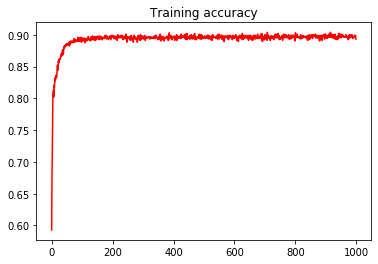

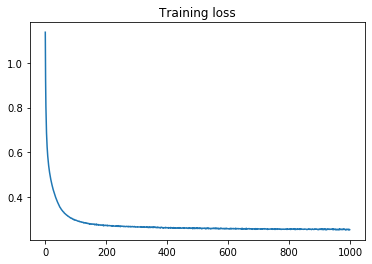

In [35]:
%matplotlib inline
acc = history.history['acc']
loss = history.history['loss']
epochs = range(len(acc))

plt.plot(epochs, acc, 'r', label='Training accuracy')
plt.title('Training accuracy')
plt.figure()

plt.plot  ( epochs,     loss )
plt.title ('Training loss')

plt.show()

In [42]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_2 (Dense)              (None, 10)                30        
_________________________________________________________________
dense_3 (Dense)              (None, 4)                 44        
Total params: 74
Trainable params: 74
Non-trainable params: 0
_________________________________________________________________


In [40]:
for layer in model.layers: 
    print(layer.get_config(), layer.get_weights())

{'name': 'dense_2', 'trainable': True, 'batch_input_shape': (None, 2), 'dtype': 'float32', 'units': 10, 'activation': 'tanh', 'use_bias': True, 'kernel_initializer': {'class_name': 'GlorotUniform', 'config': {'seed': None}}, 'bias_initializer': {'class_name': 'Zeros', 'config': {}}, 'kernel_regularizer': None, 'bias_regularizer': None, 'activity_regularizer': None, 'kernel_constraint': None, 'bias_constraint': None} [array([[-0.08363099, -0.22194204, -0.27964196,  0.03402408,  0.25706342,
        -0.35111278, -0.31166047,  0.00581787,  0.16141012, -0.25127128],
       [-0.58570766,  0.44510177, -0.27765983, -0.5880989 ,  0.02217935,
         0.25718305, -0.15484634,  0.32296896, -0.41030473, -0.21239175]],
      dtype=float32), array([-0.31386778,  0.8248794 , -0.5236593 ,  0.23841   , -0.65282947,
        1.2638236 , -1.1181926 ,  2.1126301 , -0.04525269, -0.06428543],
      dtype=float32)]
{'name': 'dense_3', 'trainable': True, 'dtype': 'float32', 'units': 4, 'activation': 'softmax',

In [47]:
# getting put weight and biases : 
W = 0
B = 0
W_ = 0
B_ = 0
for i,layer in enumerate(model.layers):
    if i == 0:
        W_ = layer.get_weights()[0].T
        B_ = layer.get_weights()[1].reshape(10,1)
    elif i == 1:
        W = layer.get_weights()[0].T
        B = layer.get_weights()[1].reshape(4,1)

In [49]:
def FOR_PASS_KERAS(x , W,B,W_,B_):
    z1 = np.dot(W_,x) + B_
    a1 = tan(z1)
    z2 = np.dot(W,a1) + B
    a2 = soft(z2)
    return a2

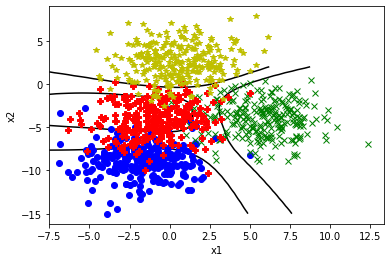

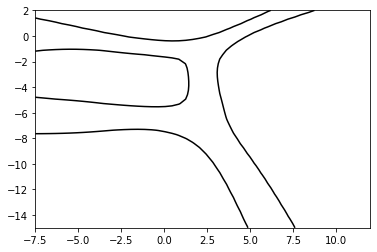

In [51]:
def decision_plot(w,b,w_,b_,k):
    u_vals = np.linspace(-7.5,12,50)
    v_vals= np.linspace(-15,2,50)
    z = np.zeros((len(u_vals),len(v_vals)))
    for i in range(len(u_vals)):
        for j in range(len(v_vals)):
            a = np.array([[u_vals[i]],[v_vals[j]]])
            val = forward_pass(a,w,b,w_,b_)
            z[i,j] = val[k]    
    plt.contour(u_vals,v_vals,z.T,0,colors = ['black'])

for i in range(4):
    decision_plot(W,B,W_,B_,i)
    
plt.plot(pos0[:,0],pos0[:,1],'bo')
plt.plot(pos1[:,0],pos1[:,1],'gx')
plt.plot(pos2[:,0],pos2[:,1],'rP')
plt.plot(pos3[:,0],pos3[:,1],'y*')
plt.xlabel('x1')
plt.ylabel('x2')
plt.show()

plt.figure()
for i in range(4):
    decision_plot(W,B,W_,B_,i)

## Thus we can say by comparing that the self implemented model is overfitting as the curves are complex in that !!

## Reducing the epochs and making decision plot for above again we get : 

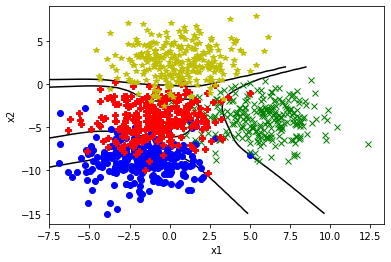

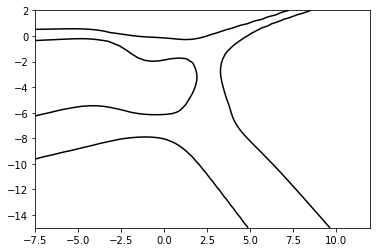

In [52]:

def decision_plot(w,b,w_,b_,k):
    u_vals = np.linspace(-7.5,12,50)
    v_vals= np.linspace(-15,2,50)
    z = np.zeros((len(u_vals),len(v_vals)))
    for i in range(len(u_vals)):
        for j in range(len(v_vals)):
            a = np.array([[u_vals[i]],[v_vals[j]]])
            val = forward_pass(a,w,b,w_,b_)
            z[i,j] = val[k]    
    plt.contour(u_vals,v_vals,z.T,0,colors = ['black'])

for i in range(4):
    decision_plot(w,b,w_,b_,i)
    
plt.plot(pos0[:,0],pos0[:,1],'bo')
plt.plot(pos1[:,0],pos1[:,1],'gx')
plt.plot(pos2[:,0],pos2[:,1],'rP')
plt.plot(pos3[:,0],pos3[:,1],'y*')
plt.xlabel('x1')
plt.ylabel('x2')
plt.show()

plt.figure()
for i in range(4):
    decision_plot(w,b,w_,b_,i)

## This plot is quite similar to the plot of keras hence we got out decision boundary and plotted for SOFTMAX function with 10 hidden layers neural network 